# Visualizing segments of the data

First, we import everything we need and load the dataset:

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import functools
from pathlib import Path
from typing import Tuple

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas
import scipy.signal as signal

from muscle_synergies import load_vicon_file


from segment import (
    Segmenter,
    SegmentPlotter,
    Trecho,
    Cycle,
    Phase
)

In [2]:
cwd = Path().resolve()
data_dir = cwd / '..' / 'sample_data'
abridged_dataset = data_dir / 'abridged_data.csv' # useful for testing
full_dataset = data_dir / 'dynamic_trial.csv'
dataset = full_dataset.resolve()
vicon_data = load_vicon_file(dataset)
vicon_data

ViconNexusData(forcepl=[...], emg=<DeviceData>, traj=[...])

# The ground reactions 

We begin by visualizing the 2 ground reactions:

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
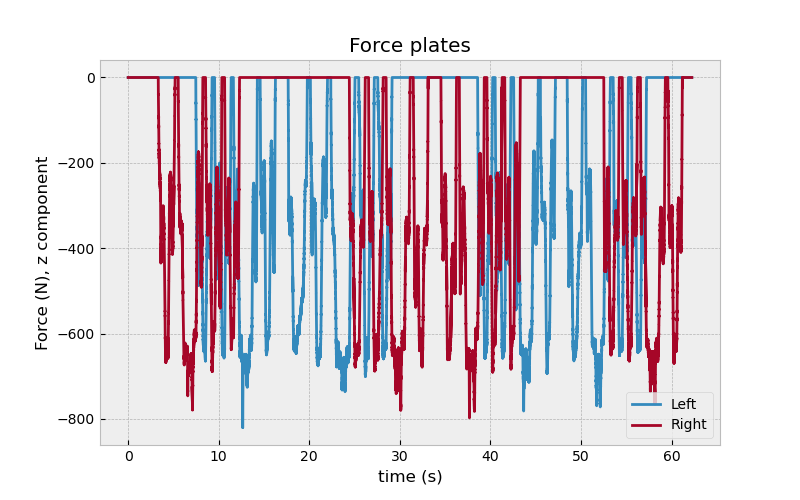

In [3]:
segmenter = Segmenter(vicon_data)
SegmentPlotter(vicon_data, segmenter).plot_reactions(figsize=(8, 5))
plt.show()

# Trecho 1 ground reactions

The following is what the code believes trecho 1 to be:

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
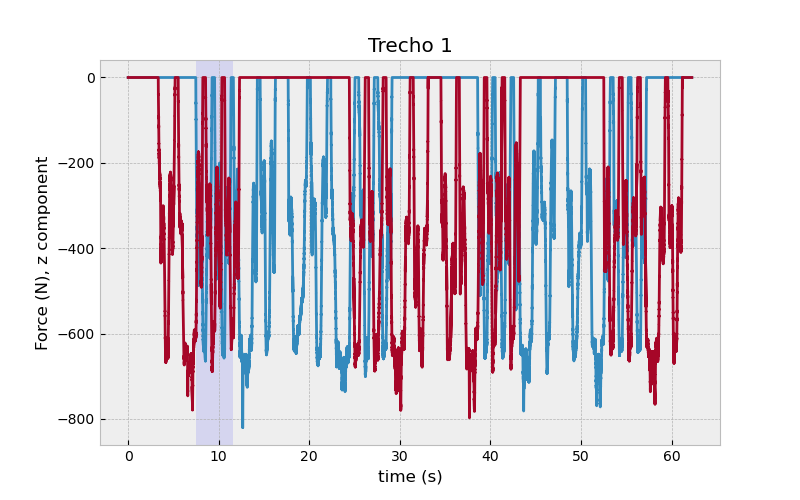

In [9]:
fig, ax = SegmentPlotter(vicon_data, segmenter).plot_segment("force plate", "Fz", time=1, show=False)
fig.set_size_inches(8, 5)
ax.set_title("Trecho 1 - Forces")
ax.set_ylabel("Force (N), z component")
ax.set_xlabel("time (s)")
plt.show()

# Trecho 1 EMG (VL)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
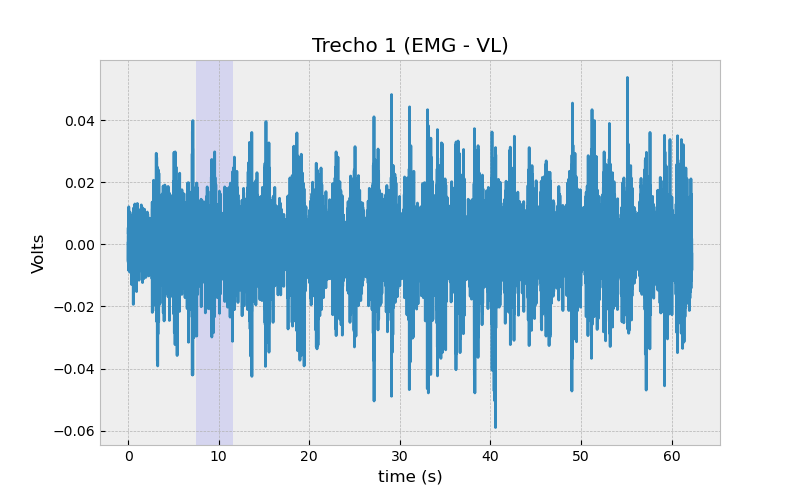

In [13]:
fig, ax = SegmentPlotter(vicon_data, segmenter).plot_segment(
    "emg", "VL", device_inds=[0, 1], time=1, show=False)
fig.set_size_inches(8, 5)
ax.set_title("Trecho 1 (EMG - VL)")
ax.set_ylabel("Volts")
ax.set_xlabel("time (s)")
plt.show()

# Every segment

Now we turn to an interactive plot to do the same for every segment of the ground reactions.
First we set everything up:

In [16]:
show_entire_time_choice = widgets.Checkbox(
    value=False,
    description="Focus",
    disabled=False,
    indent=False
)

trecho_choice = widgets.Dropdown(
    options=[1, 2, 3, 4],
    value=1,
    description="Trecho:")

cycle_choice = widgets.Dropdown(
    options=[("Both", None), 
             ("First", 1),
             ("Second", 2)],
    value=None,
    description="Cycle:")

phase_choice = widgets.Dropdown(
    options=[("All", None),
             ("Phase 1", 1),
             ("Phase 2", 2),
             ("Phase 3", 3),
             ("Phase 4", 4),
            ],
    value=None,
    description="Phase:")

figsize_choice = widgets.Text(value="8 x 5", description="Size:")

def parse_figsize(figsize_str: str) -> Tuple[int, int]:
    x_str, y_str = figsize_str.replace(" ", "").split("x")
    return int(x_str), int(y_str)

def plot_segment(trecho, cycle, phase, figsize_str, focus):
    plt.close("all")
    
    try:
        figsize = parse_figsize(figsize_str)
    except:
        figsize = (10, 5)
        print("didn't understand size")
    if cycle is None and phase is not None:
        # cycle_choice.value = Cycle.FIRST
        # cycle = Cycle.FIRST
        phase = None
    if phase is not None:
        phase_type = segmenter.ith_phase(trecho, phase)
        phase_name = phase_type.value
        phase_choice.description = f"Phase ({phase_name})"
    fig, ax = SegmentPlotter(vicon_data, segmenter).plot_segment(
        "force plate", "Fz", labels=["left", "right"], 
        time=(trecho, cycle, phase),
        show_entire=not focus, show=False)
    ax.legend()
    fig.set_size_inches(*figsize)
    ax.set_xlabel("time (s)")
    ax.set_ylabel("Force (N), z component")
    ax.set_title("Ground reactions")
    plt.show()
    return

The plots:

In [17]:
widgets.interact(plot_segment,
                 trecho=trecho_choice,
                 cycle=cycle_choice,
                 phase=phase_choice,
                 figsize_str=figsize_choice,
                 focus=show_entire_time_choice,)

interactive(children=(Dropdown(description='Trecho:', options=(1, 2, 3, 4), value=1), Dropdown(description='Cy…

<function __main__.plot_segment(trecho, cycle, phase, figsize_str, focus)>